In [3]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 369 kB/s 


In [4]:
import os

In [5]:
import pandas as pd

In [6]:
from tabulate import tabulate

In [7]:
import mysql.connector as sql

In [8]:
db_connection = sql.connect(host='208.109.18.154', database='ids17db', user='ids17', password='Kjw9012')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

ExpectancyDF = pd.DataFrame(table_rows)

print(tabulate(ExpectancyDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤══════╤═══════╤═════╤═══════╤══════════════╤══════╤═══════╤══════════════╤════════════╤══════╕
│     │ 0                        │    1 │     2 │   3 │     4 │            5 │    6 │     7 │            8 │          9 │   10 │
╞═════╪══════════════════════════╪══════╪═══════╪═════╪═══════╪══════════════╪══════╪═══════╪══════════════╪════════════╪══════╡
│   0 │ Afghanistan              │ 2010 │ 58.8  │ 279 │  0.01 │    79.6794   │ 16.7 │  9.2  │    553.329   │    2883167 │  9.2 │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   1 │ Afghanistan              │ 2011 │ 59.2  │ 275 │  0.01 │     7.09711  │ 17.2 │  7.87 │     63.5372  │    2978599 │  9.5 │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   2 │ Afghanistan              │ 2012 │ 59.5  │ 272 │  0.01 │    78.1842   │ 17.6 │  8.52 │    

In [9]:
ExpectancyDF.columns = ['Country','Year','Life_Expectancy','Adult_Mortality','Alcohol','Percentage_Expenditure','BMI','Total_Expenditure','GDP','Population','Schooling']

print(tabulate(ExpectancyDF, headers='keys', tablefmt='fancy_grid'))


╒═════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════╤═════════════╕
│     │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │   Population │   Schooling │
╞═════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════╪═════════════╡
│   0 │ Afghanistan              │   2010 │             58.8  │               279 │      0.01 │                79.6794   │  16.7 │                9.2  │    553.329   │      2883167 │         9.2 │
├─────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────┼─────────────┤
│   1 │ Afghani

In [10]:
ExpectancyDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,8.560000e+02,856.000000
mean,2012.496495,70.537430,158.870327,4.178458,1011.071696,39.870327,6.038026,7730.711121,1.335176e+07,12.644042
std,1.707907,8.886691,111.048267,3.795497,2327.538535,20.585439,2.409102,14796.802371,5.362515e+07,2.973853
min,2010.000000,36.300000,1.000000,0.010000,0.108056,2.000000,0.760000,8.376432,4.100000e+01,4.500000
25%,2011.000000,63.800000,70.500000,0.430000,67.694359,22.175000,4.752500,686.911106,2.483085e+05,10.600000
50%,2012.500000,72.700000,141.000000,3.570000,371.111647,45.000000,5.400000,2616.285584,1.515082e+06,12.700000
75%,2014.000000,76.200000,227.250000,6.892500,862.888706,58.500000,7.530000,7130.859259,8.276836e+06,14.800000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,83.300000,16.610000,119172.741800,1.293859e+09,20.400000


In [11]:
ExpectancyDF.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                      2.916947e+00
Life_Expectancy           7.897327e+01
Adult_Mortality           1.233172e+04
Alcohol                   1.440580e+01
Percentage_Expenditure    5.417436e+06
BMI                       4.237603e+02
Total_Expenditure         5.803770e+00
GDP                       2.189454e+08
Population                2.875657e+15
Schooling                 8.843801e+00
dtype: float64

In [12]:
from scipy.stats import pearsonr

data1 = ExpectancyDF['Life_Expectancy']
data2 = ExpectancyDF['Adult_Mortality']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74874


In [13]:
ExpectancyDF.corr()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.061103,-0.031863,-0.164927,-0.008085,0.051677,-0.081335,-0.013141,0.023245,0.060444
Life_Expectancy,0.061103,1.000000,-0.748739,0.435183,0.392184,0.522202,0.229150,0.465815,-0.033478,0.803615
Adult_Mortality,-0.031863,-0.748739,1.000000,-0.227662,-0.249663,-0.386093,-0.132522,-0.297913,0.024512,-0.552962
Alcohol,-0.164927,0.435183,-0.227662,1.000000,0.386903,0.270719,0.256727,0.419697,-0.029066,0.534065
Percentage_Expenditure,-0.008085,0.392184,-0.249663,0.386903,1.000000,0.214206,0.271508,0.904076,-0.032225,0.385215
BMI,0.051677,0.522202,-0.386093,0.270719,0.214206,1.000000,0.162463,0.271631,-0.074999,0.501895
Total_Expenditure,-0.081335,0.229150,-0.132522,0.256727,0.271508,0.162463,1.000000,0.259113,-0.069817,0.246330
GDP,-0.013141,0.465815,-0.297913,0.419697,0.904076,0.271631,0.259113,1.000000,-0.028964,0.479472
Population,0.023245,-0.033478,0.024512,-0.029066,-0.032225,-0.074999,-0.069817,-0.028964,1.000000,-0.048138
Schooling,0.060444,0.803615,-0.552962,0.534065,0.385215,0.501895,0.246330,0.479472,-0.048138,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

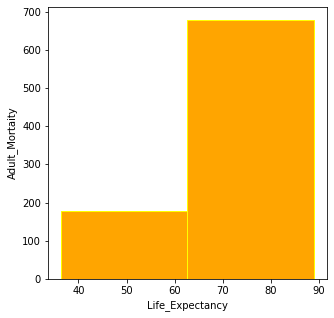

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(ExpectancyDF['Life_Expectancy'], bins=2, color="orange", edgecolor="yellow")

plt.xlabel('Life_Expectancy')
plt.ylabel('Adult_Mortaity')

plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
mean_squared_error(y_true, y_pred)

0.375

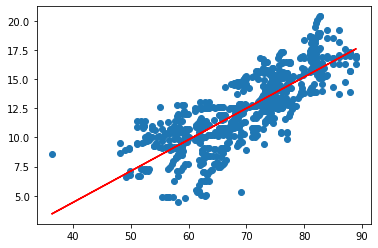

In [ ]:
X = ExpectancyDF.loc[:,'Life_Expectancy'].values.reshape(-1,1)

Y = ExpectancyDF.loc[:,'Schooling'].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()


In [ ]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)


The slope:  [[0.26892275]]
The intercept:  [-6.32507767]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  3.128838215956491
R2:  0.645797347147856
